In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import cufflinks as cf

cf.go_offline()

In [22]:
from helpers import initial_formatting

df = pd.read_csv('data/Sales_September_2019.csv')

df = initial_formatting(df)

In [7]:
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,248151,AA Batteries (4-pack),4.0,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2.0,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1.0,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1.0,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1.0,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


# Price per product (not in dashboard - could be bonus task!)

/var/folders/jd/gg7dwvy50w9ctsv_jzd2w4180000gq/T/ipykernel_7018/1053014001.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



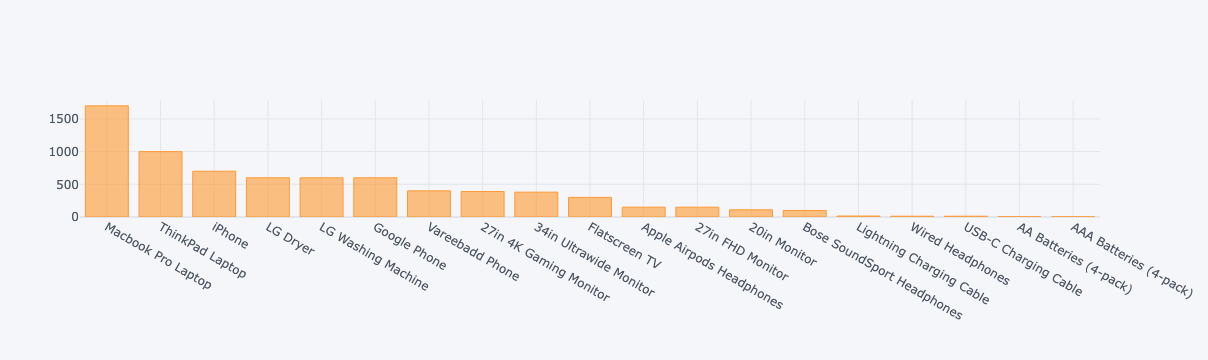

In [8]:
(
    df
    .groupby('product')
    .mean()
    ['price_each']
    .sort_values(ascending=False)
    .iplot(kind='bar')
)

# Filter out some main products

In [31]:
df.head(10)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,248151,AA Batteries (4-pack),4.0,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2.0,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1.0,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1.0,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1.0,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301"
5,248156,34in Ultrawide Monitor,1.0,379.99,2019-09-13 14:59:00,"469 12th St, Los Angeles, CA 90001"
6,248157,Lightning Charging Cable,1.0,14.95,2019-09-07 09:59:00,"773 Johnson St, Portland, ME 04101"
7,248158,Lightning Charging Cable,1.0,14.95,2019-09-02 14:16:00,"682 Sunset St, Los Angeles, CA 90001"
8,248159,Vareebadd Phone,1.0,400.00,2019-09-06 16:45:00,"664 Wilson St, New York City, NY 10001"
9,248160,Wired Headphones,1.0,11.99,2019-09-01 22:03:00,"446 9th St, San Francisco, CA 94016"


In [45]:
top_3 = (
    df
    [['product', 'quantity_ordered']]
    .groupby('product')
    .sum()
    .sort_values(by='quantity_ordered', ascending=False)
    .head(3)
    .index
)

In [46]:
top_3

Index(['AAA Batteries (4-pack)', 'AA Batteries (4-pack)',
       'USB-C Charging Cable'],
      dtype='object', name='product')

In [48]:
top_3 = (
    df
    [['product', 'quantity_ordered']]
    .groupby('product')
    .sum()
    .sort_values('quantity_ordered', ascending=False)
    .head(3)
    .index
)

df = df[df['product'].isin(top_3)]

# Resampling example 

## The function used in the dashboard (explicit loop over products)

In [50]:
def resample_data(df, frequency, agg_dict):
    resampled_data_list = []
    unique_products = df['product'].unique()

    for product in unique_products:
        product_data = df[df['product'] == product]

        if frequency == 'hourly':
            resampled_product_data = product_data.resample('H', on='order_date').agg(agg_dict)
        elif frequency == 'daily':
            resampled_product_data = product_data.resample('D', on='order_date').agg(agg_dict)
        elif frequency == 'weekly':
            resampled_product_data = product_data.resample('W', on='order_date').agg(agg_dict)
        else:
            Exception('Invalid frequency')

        resampled_product_data['product'] = product
        resampled_data_list.append(resampled_product_data)

    resampled_data = pd.concat(resampled_data_list)
    return resampled_data.reset_index()

In [51]:
# TODO: Experiment with calling the function above
# and plot the result in some reasonable way with iplot 
# for example group by product, sum and plot only quantity
resample_data(df, 'hourly', {'quantity_ordered': 'sum', 'price_each': 'mean'})

,order_date,quantity_ordered,price_each,product
0,2019-09-01 06:00:00,4.0,3.84,AA Batteries (4-pack)
1,2019-09-01 07:00:00,2.0,3.84,AA Batteries (4-pack)
2,2019-09-01 08:00:00,0.0,NaN,AA Batteries (4-pack)
3,2019-09-01 09:00:00,2.0,3.84,AA Batteries (4-pack)
4,2019-09-01 10:00:00,1.0,3.84,AA Batteries (4-pack)
...,...,...,...,...
2145,2019-09-30 23:00:00,0.0,NaN,AAA Batteries (4-pack)
2146,2019-10-01 00:00:00,1.0,2.99,AAA Batteries (4-pack)
2147,2019-10-01 01:00:00,0.0,NaN,AAA Batteries (4-pack)
2148,2019-10-01 02:00:00,0.0,NaN,AAA Batteries (4-pack)


In [57]:
df['order_date'].dt.hour

0        14
1        10
2        17
4        19
10       16
         ..
11676    22
11678    13
11680    15
11681    20
11685     0
Name: order_date, Length: 4055, dtype: int64

In [52]:
# Group/Slice over some time dimension (hour of day etc)
df['dom'] = df['order_date'].dt.day
df['dow'] = df['order_date'].dt.weekday
df['hod'] = df['order_date'].dt.hour

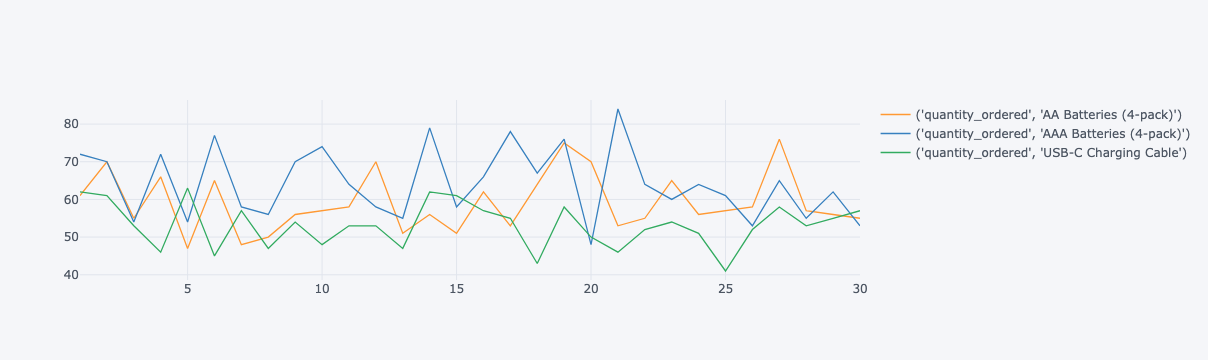

In [62]:
# TODO: Experiment with changing the slicer
slice_by = 'dom'
(
    df
    [['quantity_ordered', 'product', slice_by]]
    .groupby(['product', slice_by])
    .sum()
    .unstack(level='product')  # This was a bit new to me, is not in the dashboard solution :-)
).iplot()